In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=6
paper='2008.08998'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

I'll analyze this Hamiltonian step by step to build the HartreeFockHamiltonian class.

### Question 1: Dimension and Basis Order
First, I need to identify all the flavor indices in the Hamiltonian.

Looking at the Hamiltonian, I see:
- $s$ and $s'$ - these appear to be spin indices
- $\bm{q}$ - these are reciprocal lattice vectors in the folded BZ (Γ, K, K')
- $\bm{p}$ - crystal momentum within the folded BZ

From the equation, we can see that $c_{\bm{q},s}(\bm{p})$ is an electron annihilation operator with:
- Spin index $s$
- Reciprocal lattice vector $\bm{q}$ (which can be Γ, K, or K')
- Crystal momentum $\bm{p}$ (which varies within the folded BZ)

The crystal momenta $\bm{p}$ will be handled by the k-space sampling (N_k points), so our flavor indices are just spin and reciprocal lattice vector $\bm{q}$.

For spin, assuming we have spin up and spin down, |spin| = 2.
For reciprocal lattice vectors, we have 3 high-symmetry points: Γ

In [7]:
print(generated_code['thinking'])

I'll analyze this Hamiltonian step by step to build the HartreeFockHamiltonian class.

### Question 1: Dimension and Basis Order
First, I need to identify all the flavor indices in the Hamiltonian.

Looking at the Hamiltonian, I see:
- $s$ and $s'$ - these appear to be spin indices
- $\bm{q}$ - these are reciprocal lattice vectors in the folded BZ (Γ, K, K')
- $\bm{p}$ - crystal momentum within the folded BZ

From the equation, we can see that $c_{\bm{q},s}(\bm{p})$ is an electron annihilation operator with:
- Spin index $s$
- Reciprocal lattice vector $\bm{q}$ (which can be Γ, K, or K')
- Crystal momentum $\bm{p}$ (which varies within the folded BZ)

The crystal momenta $\bm{p}$ will be handled by the k-space sampling (N_k points), so our flavor indices are just spin and reciprocal lattice vector $\bm{q}$.

For spin, assuming we have spin up and spin down, |spin| = 2.
For reciprocal lattice vectors, we have 3 high-symmetry points: Γ, K, and K', so |q| = 3.

Therefore:
Tuple of Flavors

In [8]:
print(generated_code['text'])

# Analysis of the Hamiltonian

## Question 1: Dimension and Basis Order

Looking at the Hamiltonian, I can identify the following flavors:
- Spin index `s` (and `s'`)
- Reciprocal lattice vector `q` which can be Γ, K, or K'

The creation and annihilation operators have the form c_{\bm{q},s}(\bm{p}), where \bm{p} is the crystal momentum which will be handled by k-space sampling.

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: q-vector. Order: Γ, K, K'

## Question 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- `<c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha)>`: Mean of exp_val[s, q_alpha, s, q_delta, :]
- `<c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\gamma,s'}(\bm{p}_\alpha)>`: Mean of exp_val[s, q_alpha, s', q_gamma, :]

TERMS:
- $H_0$ terms: H[s, q_alpha, s, q_beta, k], Non-interacting (NI)
- $H_{\text{Hartree}}$ terms: H[s', q_beta, s', q_gamma, k], Interacting (I)
- $H_{\text{Fock}}$ terms: H[s', q_beta, 

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with folded Brillouin zone.
    
    This class implements a Hamiltonian with both non-interacting hopping terms and
    interacting Hartree-Fock terms with Coulomb interaction.
    
    Args:
        N_shell (int): Number of shells in the Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2, 3)  # (spin, q-vector)
        self.basis_order = {'0': 'spin', '1': 'q_vector'}
        # Order: 0: spin up, spin down; 1: Gamma, K, K'
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_6.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

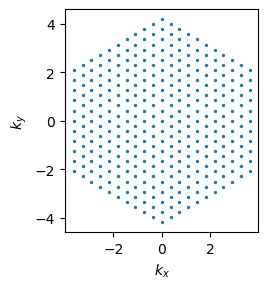

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

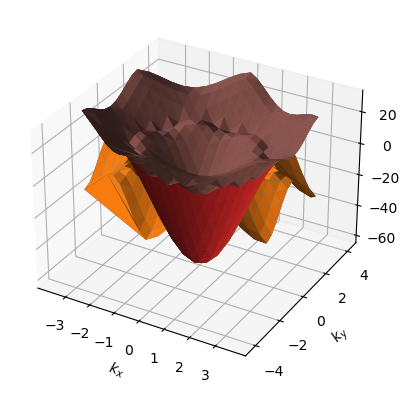

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

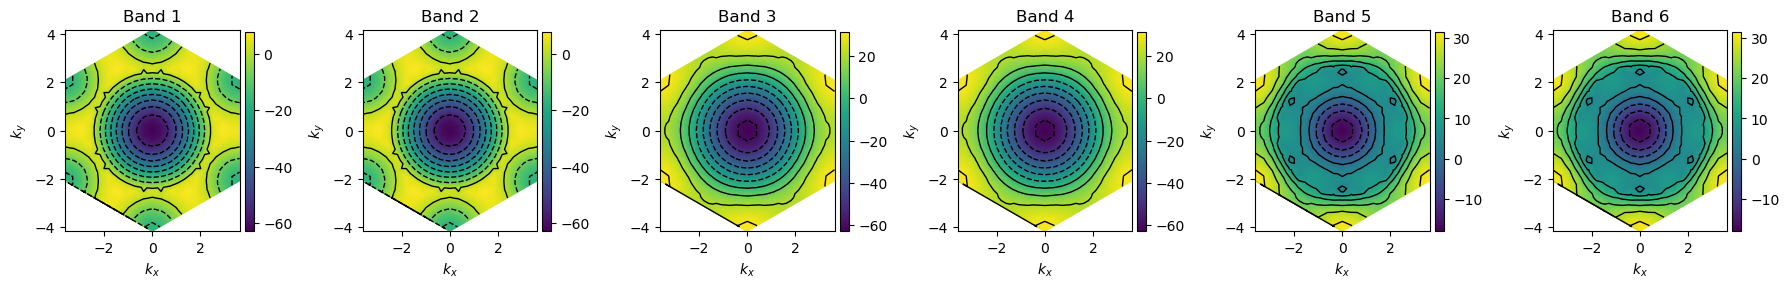

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 59


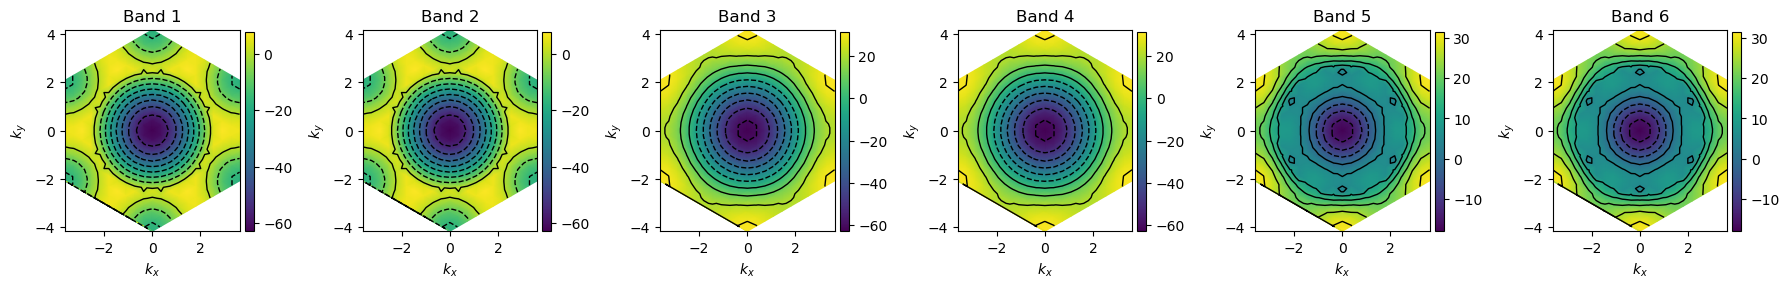

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 5


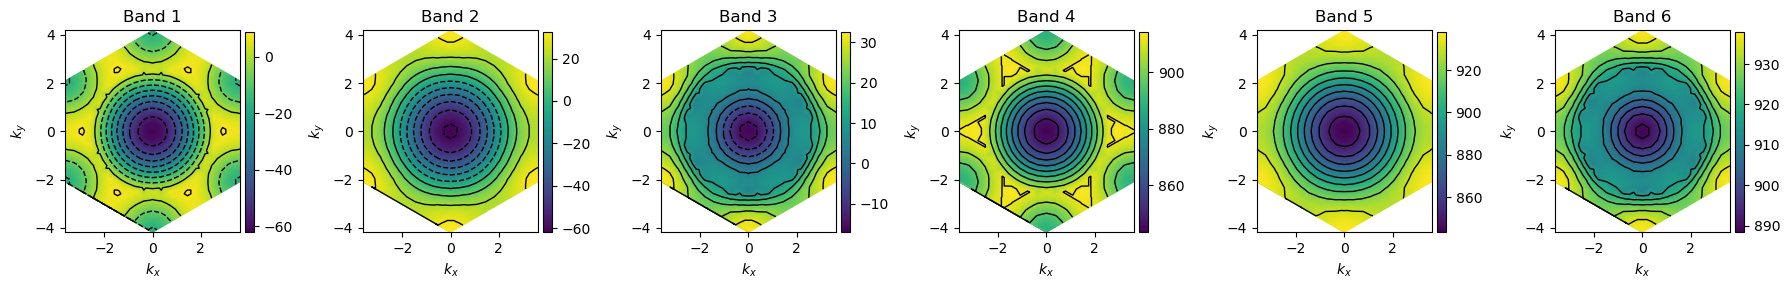

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -49.53
U/T is 10.30
mean_U is 75.61


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and the given problem to determine if the momentum space mesh shown matches the requirements for the Hartree-Fock calculation as described.

In the image, I can see:
- A hexagonal array of points in momentum space (k_x, k_y)
- The points form a regular hexagonal pattern
- The range appears to be approximately -4 to 4 in k_y and -3 to 3 in k_x

Now, let me check this against the problem description:

The problem states:
- The system is on a triangular lattice
- We're using a √3 × √3 superlattice in real space
- The crystal momentum p is defined within the folded Brillouin zone
- This folded BZ has reciprocal lattice vector length as 1/√3 of the original and is rotated by 90 degrees

For a triangular lattice, the Brillouin zone is hexagonal in shape, which matches what we see in the image. The hexagonal mesh of points in k-space corresponds to the discretization of the Brillouin zone for numerical calculations.

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric provided.

The image shows band structure plots in the first Brillouin zone for 6 different bands (labeled Band 1 through Band 6). These are false color plots with contour lines showing the energy distribution across the Brillouin zone.

Let's go through the rubric points:

1. **Shape of the Brillouin zone boundary**:
   Looking at the plots, I can see that the Brillouin zone appears to be hexagonal in shape. This is consistent with what we would expect for a triangular lattice in real space, as the first Brillouin zone of a triangular lattice is indeed hexagonal. So this criterion is satisfied.

2. **Symmetry of the energy distribution**:
   
   2.1 **Highest energy regions (yellow)**: 
   In Bands 1 and 2, the highest energy regions (yellow) appear at the corners of the hexagon.
   In Bands 3-6, the highest energy regions (yellow) appear at the edges of the hexagon.

   2.2 **Pattern

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image which shows band structure plots for what appears to be a system after a self-consistent Hartree-Fock calculation. I need to evaluate this according to the rubric.

The image shows false color plots for 6 bands (labeled Band 1 through Band 6) in momentum space. Each plot shows the energy distribution in the first Brillouin zone.

Let's go through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the plots, I can see that the Brillouin zone boundary appears to be hexagonal in shape, which is indeed what we expect for a triangular lattice. The hexagonal shape is visible in all 6 band plots. So this criterion is met.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
In Bands 1 and 2, the highest energy regions (

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric provided. I'll go through each point in the rubric step by step.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the plots, I can see that each band has a hexagonal boundary, which is indeed the expected shape for the first Brillouin zone of a triangular lattice. The hexagonal shape appears consistent across all 6 bands, so this matches what's expected.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (shown in yellow) appear around the periphery of the hexagon in all bands, with the specific pattern varying slightly between bands.

2.2 Trace the pattern of energy variation across the zone:
In all bands, there is a clear radial pattern with the lowest energy (dark blue/purple) at t

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '6' saved to final_answer.yaml
